In [36]:
# Chart Zillow Home Value Index (ZHVI) for various areas
# https://www.zillow.com/research/data/
# 
# Started 25 Aug 2023 -dtw 


import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

import plotly
from plotly import graph_objs as go
from plotly import express as px

import seaborn as sns  # Import seaborn

In [6]:
zhvi_metro_raw = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [11]:
zhvi_metro_raw

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,102001,0,United States,country,NaN,115215.060987,115417.693632,115668.835076,116207.361953,116827.017306,...,342893.791055,342019.278670,340897.172975,340243.409003,340186.438102,341377.341047,342529.876118,344118.510057,346019.054142,348126.180542
1,394913,1,"New York, NY",msa,NY,188937.406428,189741.459747,190551.713646,192192.721840,193888.790935,...,599230.535882,597398.651335,594922.993370,594887.333828,596112.580353,600050.039046,603155.817763,607323.863650,612506.387816,618653.073765
2,753899,2,"Los Angeles, CA",msa,CA,223645.274156,224472.515292,225577.803520,227796.103768,230229.751861,...,901388.388599,897672.540460,893323.330406,884961.557044,874796.651896,867473.497311,865273.506397,868900.838953,876737.860960,889296.983779
3,394463,3,"Chicago, IL",msa,IL,144553.677041,144690.734658,144948.658674,145591.296092,146362.956233,...,295984.602121,295278.942974,294593.348603,295177.666600,296265.508630,298199.210375,299544.045369,301304.103648,303807.012258,306516.933358
4,394514,4,"Dallas, TX",msa,TX,129710.334780,129775.242966,129848.594994,130032.097809,130266.530240,...,380982.324430,379062.994766,376514.698150,373917.253527,371811.542961,371082.877106,370740.713883,371147.729712,372189.451235,373555.542026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,112780.440130,110475.643320,108936.088290,111147.260409,114540.815895,118566.510496,119695.253228,120369.618804,121049.156604,122015.188041
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,411247.956356,410860.989330,409368.784197,407525.909158,406739.855554,407703.731151,409273.304196,410331.925952,409227.105953,406926.773515
892,753874,937,"Craig, CO",msa,CO,95532.892609,95775.412750,96229.230598,96875.566506,97626.611751,...,256169.152698,257737.808860,259093.460534,260214.720161,262406.699933,265753.144735,269859.303041,273595.854924,277330.894507,280163.677679
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,93666.386915,92873.235683,91377.174217,93094.920054,95531.333194,98689.509699,99340.685749,99563.064620,98473.781196,96589.790837


In [10]:
zhvi_metro_raw.columns.to_list()

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 '2004-12-31',
 '2005-01-31',
 '2005-02-28',


In [43]:
# Search function to allow searching for a part of the Region Name and returning the row # in the original DF and the matching RegionID
def display_search_results(query, results_df):
    for index, row in results_df.iterrows():
        print(f"Search Query: '{query}', Row #: {index}, RegionID: {row['RegionID']}")


In [44]:
# Search for Idaho Falls in column 'RegionName'
query = "Idaho Falls"
regex = (".*" + query + ".*")
search_results = zhvi_metro_raw.loc[zhvi_metro_raw['RegionName'].str.contains(regex, regex=True, case=False)]

# Display search results using the function
display_search_results(query, search_results)

Search Query: 'Idaho Falls', Row #: 271, RegionID: 394703


In [45]:
def search_and_display(query, dataframe):
    regex = (".*" + query + ".*")
    search_results = dataframe.loc[dataframe['RegionName'].str.contains(regex, regex=True, case=False)]
    
    for index, row in search_results.iterrows():
        print(f"Row #: {index}, Search Query: '{query}', RegionID: {row['RegionID']}")


In [48]:
# Call the function with the search query and DataFrame
search_and_display("Idaho Falls", zhvi_metro_raw)
search_and_display("Boise", zhvi_metro_raw)
search_and_display("Salt Lake City", zhvi_metro_raw)
search_and_display("Houston", zhvi_metro_raw)
search_and_display("New York", zhvi_metro_raw)

Row #: 271, Search Query: 'Idaho Falls', RegionID: 394703
Row #: 77, Search Query: 'Boise', RegionID: 394399
Row #: 47, Search Query: 'Salt Lake City', RegionID: 395053
Row #: 5, Search Query: 'Houston', RegionID: 394692
Row #: 1, Search Query: 'New York', RegionID: 394913


In [40]:
# Search for Idaho Falls in column 'RegionName'

regex = (".*" + "Idaho Falls" + ".*")

zhvi_metro_raw.loc[zhvi_metro_raw['RegionName'].str.contains(regex, regex=True, case=False)]

# Returns row 271, RegionID = 394703

     RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
271    394703       279  Idaho Falls, ID        msa        ID  109351.845172   

        2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
271  109214.964423  109157.054723  109123.807664  109371.358071  ...   

        2022-10-31     2022-11-30     2022-12-31     2023-01-31  \
271  404611.265369  399043.053615  393574.410464  389180.472679   

        2023-02-28     2023-03-31    2023-04-30     2023-05-31     2023-06-30  \
271  386499.929863  385278.477379  384865.41625  384819.477427  385801.555372   

        2023-07-31  
271  386706.746281  

[1 rows x 288 columns]


In [16]:
# Search for Boise in column 'RegionName'

regex = (".*" + "Boise" + ".*")

zhvi_metro_raw.loc[zhvi_metro_raw['RegionName'].str.contains(regex, regex=True, case=False)]

# Returns row 77, RegionID = 394399

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
77,394399,79,"Boise City, ID",msa,ID,NaN,NaN,NaN,NaN,NaN,...,482312.549081,475475.578246,468404.498036,461999.234553,457411.325528,455451.236376,455444.51807,456693.622664,459320.63397,462470.665011


In [28]:
# Extract rows with RegionID 394703 (IF) and 394399 (Boise)
region_394703 = zhvi_metro_raw[zhvi_metro_raw['RegionID'] == 394703].squeeze()  # Convert to Series
region_394399 = zhvi_metro_raw[zhvi_metro_raw['RegionID'] == 394399].squeeze()  # Convert to Series

# Set the index to the date columns and rename the Series as the Region Name instead of the row # in the original DF
region_394703 = region_394703[5:].rename_axis('Date').rename('IdahoFalls_msa')
region_394399 = region_394399[5:].rename_axis('Date').rename('Boise_msa')

# Convert the index to datetime if it's not already
region_394703.index = pd.to_datetime(region_394703.index)
region_394399.index = pd.to_datetime(region_394399.index)

print(region_394703)
print(region_394399)

Date
2000-01-31    109351.845172
2000-02-29    109214.964423
2000-03-31    109157.054723
2000-04-30    109123.807664
2000-05-31    109371.358071
                  ...      
2023-03-31    385278.477379
2023-04-30     384865.41625
2023-05-31    384819.477427
2023-06-30    385801.555372
2023-07-31    386706.746281
Name: IdahoFalls_msa, Length: 283, dtype: object
Date
2000-01-31              NaN
2000-02-29              NaN
2000-03-31              NaN
2000-04-30              NaN
2000-05-31              NaN
                  ...      
2023-03-31    455451.236376
2023-04-30     455444.51807
2023-05-31    456693.622664
2023-06-30     459320.63397
2023-07-31    462470.665011
Name: Boise_msa, Length: 283, dtype: object


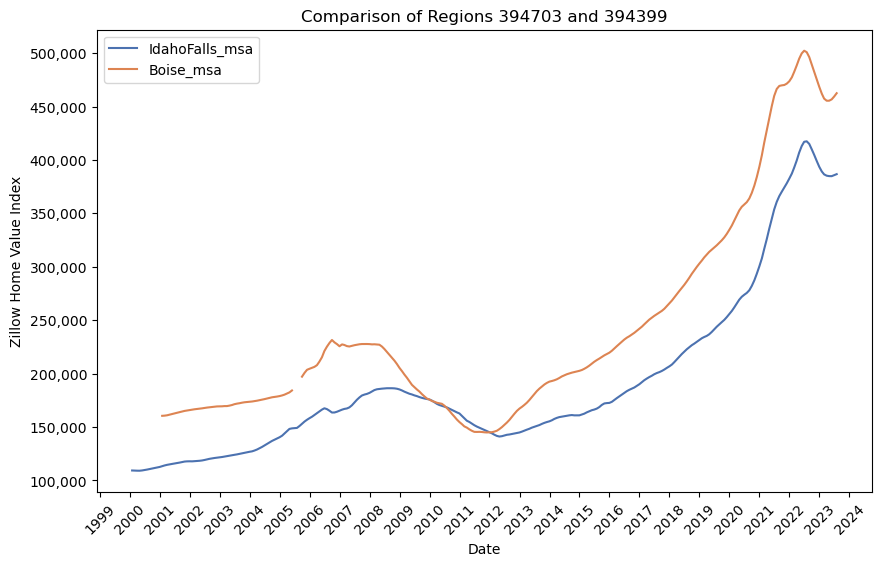

In [38]:
# Plotting

# Set the style for the plot using seaborn
sns.set_palette("deep")  # Choose the color palette ("husl" is just one example)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(region_394703.index, region_394703.values, label=region_394703.name)
plt.plot(region_394399.index, region_394399.values, label=region_394399.name)

plt.xlabel('Date')
plt.ylabel('Zillow Home Value Index')
plt.title('Comparison of Regions 394703 and 394399')
plt.legend()

# Set up year-only tick positions and formatting
years = mdates.YearLocator()  # Every year
years_fmt = mdates.DateFormatter('%Y')  # Format as year

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Format y-axis labels with commas for thousands
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

#plt.tight_layout()
plt.show()

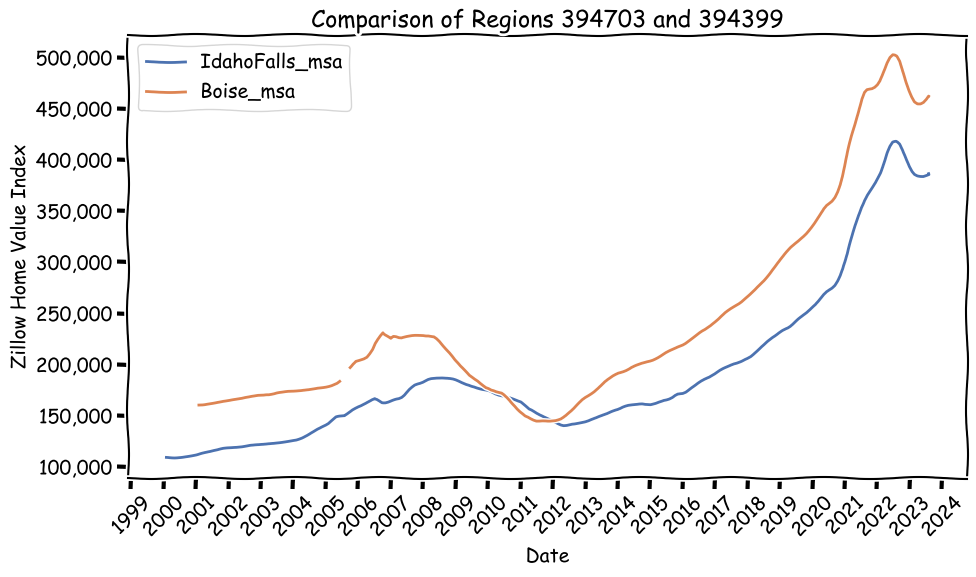

In [39]:
# Activate XKCD mode
with plt.xkcd():
    # Plotting
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(region_394703.index, region_394703.values, label=region_394703.name)
    plt.plot(region_394399.index, region_394399.values, label=region_394399.name)

    plt.xlabel('Date')
    plt.ylabel('Zillow Home Value Index')
    plt.title('Comparison of Regions 394703 and 394399')
    plt.legend()

    # Set up year-only tick positions and formatting
    years = mdates.YearLocator()  # Every year
    years_fmt = mdates.DateFormatter('%Y')  # Format as year

    plt.gca().xaxis.set_major_locator(years)
    plt.gca().xaxis.set_major_formatter(years_fmt)
    
    # Format y-axis labels with commas for thousands
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))


    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

Row #: 744, Search Query: 'Jackson, WY', RegionID: 394713
Row #: 164, Search Query: 'Kennewick', RegionID: 394741
Row #: 271, Search Query: 'Idaho Falls', RegionID: 394703
Row #: 77, Search Query: 'Boise', RegionID: 394399
Row #: 29, Search Query: 'Austin, TX', RegionID: 394355
Row #: 4, Search Query: 'Dallas', RegionID: 394514
Row #: 1, Search Query: 'New York', RegionID: 394913
Row #: 38, Search Query: 'Providence', RegionID: 395005
Row #: 3, Search Query: 'Chicago', RegionID: 394463
Row #: 82, Search Query: 'Des Moines', RegionID: 394531
[394913, 394463, 394531, 394703, 394514, 394355, 394741, 394713, 395005, 394399]
     RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
1      394913         1     New York, NY        msa        NY  188937.406428   
3      394463         3      Chicago, IL        msa        IL  144553.677041   
4      394514         4       Dallas, TX        msa        TX  129710.334780   
29     394355        29       Austin, TX        msa 

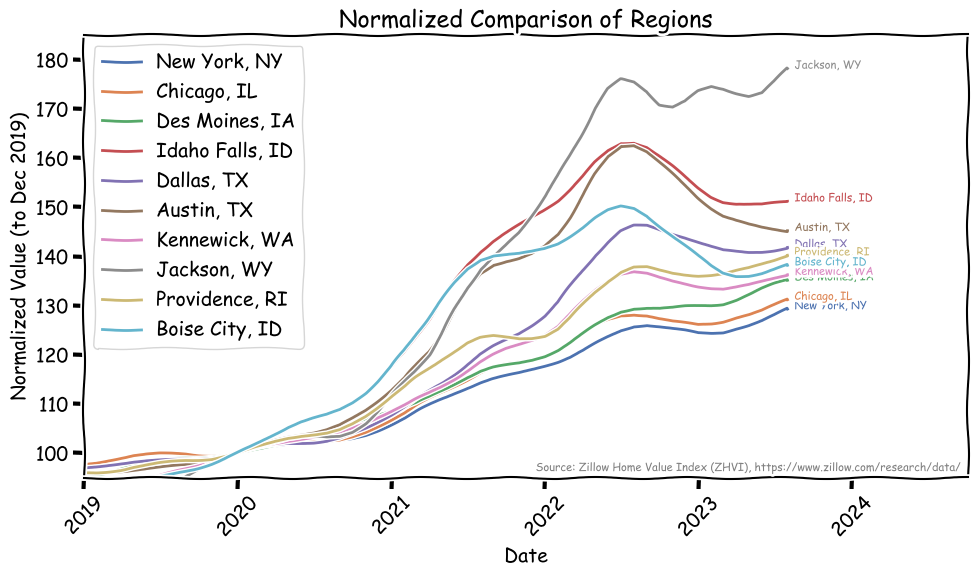

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns

zhvi_metro_raw = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

def search_and_display(queries, dataframe):
    matching_region_ids = []  # Initialize a list to store matching RegionIDs
    
    for query in queries:
        regex = (".*" + query + ".*")
        search_results = dataframe.loc[dataframe['RegionName'].str.contains(regex, regex=True, case=False)]
        
        # Collect matching RegionIDs
        matching_region_ids.extend(search_results['RegionID'].tolist())
        
        for index, row in search_results.iterrows():
            print(f"Row #: {index}, Search Query: '{query}', RegionID: {row['RegionID']}")
    
    return list(set(matching_region_ids))  # Return unique RegionIDs



def plot_normalized_data(dataframe, region_ids):
    # Extract data for the specified region names
    region_data = dataframe[dataframe['RegionID'].isin(region_ids)]  # Use matching RegionIDs
    print(region_data)
    
    # Normalize data to December 2019 values
    dec_2019_values = region_data.loc[:, '2019-12-31']
    normalized_data = region_data.iloc[:, 5:].div(dec_2019_values, axis=0) * 100

    # Set RegionID as index before transposing
    normalized_data.index = region_data['RegionID']

    # Transpose the normalized_data dataframe
    normalized_data = normalized_data.T
    
    # Set the index to datetime if it's not already
    normalized_data.index = pd.to_datetime(normalized_data.index)
    print(normalized_data)
    
    # Activate XKCD style and set color palette
    with plt.xkcd():
        sns.set_palette("deep")
        
        # Plotting
        plt.figure(figsize=(10, 6))

        # prev_date = None

        # for region_id in region_ids:
        #     region_name = region_data[region_data['RegionID'] == region_id]['RegionName'].values[0]
        #     plt.plot(normalized_data.index, normalized_data.loc[:, region_id].values, label=region_name)

        #     # Annotate with RegionName using leader line
        #     last_value = normalized_data.loc[:, region_id].values[-1]
        #     last_date = normalized_data.index[-1]
        #     plt.annotate(region_name,
        #                  xy=(last_date, last_value),
        #                  xytext=(10, 10),
        #                  textcoords='offset points',
        #                  arrowprops=dict(arrowstyle='->'))

        for region_id in region_ids:
            region_name = region_data[region_data['RegionID'] == region_id]['RegionName'].values[0]
            plt.plot(normalized_data.index, normalized_data.loc[:, region_id].values, label=region_name)
            
            # Annotate with RegionName at the rightmost point
            last_date = normalized_data.index[-1]
            last_value = normalized_data.loc[:, region_id].values[-1]
            plt.annotate(region_name,
                         xy=(last_date, last_value),
                         xytext=(5, 0),
                         textcoords='offset points',
                         fontsize=8,  # Adjust the font size as needed
                         color=sns.color_palette()[region_ids.index(region_id)])
        

        #     # Find the index of the latest date with a value greater than 105 (for label spacing)
        #     last_date = normalized_data[normalized_data[region_id] > 105].index[-1]
            
        #     if prev_date is None or (last_date - prev_date).days > 60:  # Minimum gap between labels
        #         plt.plot(normalized_data.index, normalized_data.loc[:, region_id].values, label=None)
                
        #         # Annotate with RegionName using leader line
        #         last_value = normalized_data.loc[:, region_id].values[-1]
        #         plt.annotate(region_name,
        #                      xy=(last_date, last_value),
        #                      xytext=(10, 10),
        #                      textcoords='offset points',
        #                      arrowprops=dict(arrowstyle='->'))
                
        #         prev_date = last_date




        # for region_id in region_ids:
        #     region_name = region_data[region_data['RegionID'] == region_id]['RegionName'].values[0]
        #     plt.plot(normalized_data.index, normalized_data.loc[:, region_id].values, label=region_name)
            
        #     # Annotate with RegionName using leader line
        #     last_value = normalized_data.loc[:, region_id].values[-1]
        #     plt.annotate(region_name,
        #                  xy=(normalized_data.index[-1], last_value),
        #                  xytext=(10, 10),
        #                  textcoords='offset points',
        #                  arrowprops=dict(arrowstyle='->'))



            
        # last_ann_y = 1.05  # Initial annotation position
        # for region_id in region_ids:
        #     region_name = region_data[region_data['RegionID'] == region_id]['RegionName'].values[0]
        #     plt.plot(normalized_data.index, normalized_data.loc[:, region_id].values, label=region_name)
            
        #     # Annotate with RegionName using leader line
        #     last_value = normalized_data.loc[:, region_id].values[-1]
        #     last_date = normalized_data.index[-1]
        #     annotation_y = max(last_value, last_ann_y + 0.02)  # Adjust vertical position
            
        #     plt.annotate(region_name,
        #                  xy=(last_date, annotation_y),
        #                  xytext=(10, 10),
        #                  textcoords='offset points',
        #                  arrowprops=dict(arrowstyle='->'))
            
        #     last_ann_y = annotation_y



                    
        plt.xlabel('Date')
        plt.ylabel('Normalized Value (to Dec 2019)')
        plt.title('Normalized Comparison of Regions')
        plt.legend()

        # Set up year-only tick positions and formatting
        years = mdates.YearLocator()
        years_fmt = mdates.DateFormatter('%Y')

        plt.gca().xaxis.set_major_locator(years)
        plt.gca().xaxis.set_major_formatter(years_fmt)

        # Set x-axis limits from 2019 onwards
        plt.xlim(pd.Timestamp('2019-01-01'), None)

        # Set y-axis limits
        plt.ylim([95,185])

        plt.xticks(rotation=45)

        # Source of data reference
        plt.annotate("Source: Zillow Home Value Index (ZHVI), https://www.zillow.com/research/data/",
             xy=(1, 0), xycoords='axes fraction',
             xytext=(-5, 5), textcoords='offset points',
             fontsize=8, color='gray', ha='right')

        plt.tight_layout()
        plt.show()

# Example region names
# example_region_names = ['Idaho Falls', 'Boise', 'Austin, TX', 'Houston', 'New York', 'Providence', 'Chicago', 'Des Moines']  # Add your region names
# example_region_names = ['Boise', 'Austin, TX']

# Call search_and_display to get matching RegionIDs
matching_region_ids = search_and_display(['Jackson, WY', 'Kennewick', 'Idaho Falls', 'Boise', 'Austin, TX', 'Dallas', 'New York', 'Providence', 'Chicago', 'Des Moines'], zhvi_metro_raw)
print(matching_region_ids)

# Call plot_normalized_data with the matching RegionIDs
plot_normalized_data(zhvi_metro_raw, matching_region_ids)

# # Call the function to plot normalized data
# plot_normalized_data(zhvi_metro_raw, example_region_names)


In [51]:

# Print unique values in the 'RegionName' column
print(zhvi_metro_raw['RegionName'].unique())

['United States' 'New York, NY' 'Los Angeles, CA' 'Chicago, IL'
 'Dallas, TX' 'Houston, TX' 'Washington, DC' 'Philadelphia, PA'
 'Miami, FL' 'Atlanta, GA' 'Boston, MA' 'Phoenix, AZ' 'San Francisco, CA'
 'Riverside, CA' 'Detroit, MI' 'Seattle, WA' 'Minneapolis, MN'
 'San Diego, CA' 'Tampa, FL' 'Denver, CO' 'Baltimore, MD' 'St. Louis, MO'
 'Orlando, FL' 'Charlotte, NC' 'San Antonio, TX' 'Portland, OR'
 'Sacramento, CA' 'Pittsburgh, PA' 'Cincinnati, OH' 'Austin, TX'
 'Las Vegas, NV' 'Kansas City, MO' 'Columbus, OH' 'Indianapolis, IN'
 'Cleveland, OH' 'San Jose, CA' 'Nashville, TN' 'Virginia Beach, VA'
 'Providence, RI' 'Jacksonville, FL' 'Milwaukee, WI' 'Oklahoma City, OK'
 'Raleigh, NC' 'Memphis, TN' 'Richmond, VA' 'Louisville, KY'
 'New Orleans, LA' 'Salt Lake City, UT' 'Hartford, CT' 'Buffalo, NY'
 'Birmingham, AL' 'Rochester, NY' 'Grand Rapids, MI' 'Tucson, AZ'
 'Urban Honolulu, HI' 'Tulsa, OK' 'Fresno, CA' 'Worcester, MA' 'Omaha, NE'
 'Bridgeport, CT' 'Greenville, SC' 'Albuquerque, N